In [12]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [14]:
#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

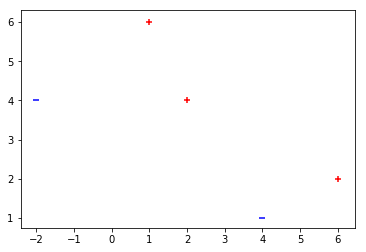

In [15]:
# Visulizing the data points
for d, sample in enumerate(X):
    if(y[d] < 0):
        plt.scatter(sample[0], sample[1],color = 'blue' , marker = '_')
    else:
        plt.scatter(sample[0], sample[1], color = 'red', marker = '+')
# plt.show()

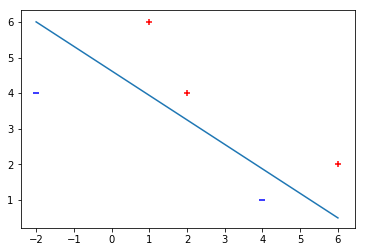

In [16]:
# Plotting a possible hyper plane
for d, sample in enumerate(X):
    if(y[d] < 0):
        plt.scatter(sample[0], sample[1],color = 'blue' , marker = '_')
    else:
        plt.scatter(sample[0], sample[1], color = 'red', marker = '+')
        
# Hyper plane
plt.plot([-2,6],[6,0.5])

In [17]:
def svm_plot(X,Y):
    # Initialize weights for SVM as zero
    weights = np.zeros(len(X[0]))
    # Learning Rate
    eta = 1
    # Number of iterations to be trained
    epochs = 100000
    # Store misclassifications for visualization purposes
    errors = []
    
    for epoch in range(1,epochs):
        error = 0
        # Regularizer value
        _lambda = 1/epoch
        for i,x in enumerate(X):
            e = 1 - (Y[i] * np.dot(X[i],weights))
            # Misclassification
            if e > 0:
                weights = weights + eta * ((X[i] * Y[i]) + ( 2 * _lambda * weights))
                error = 1
            else:
                weights = weights + eta * (-2 * _lambda * weights)
        errors.append(error)
#         print(weights)
    return weights,errors

In [18]:
w,errors = svm_plot(X,y)

In [19]:
w

array([1.15444522, 2.30815456, 8.0799865 ])

/home/akshay/.virtualenvs/py3ml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


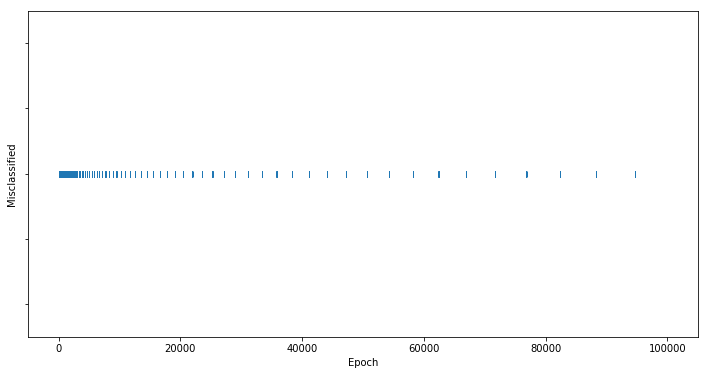

In [20]:
# Visualizing errors
plt.figure(figsize=(12,6))
plt.plot(errors,'|')
plt.ylim(0.5,1.5)
plt.axes().set_yticklabels([])
plt.xlabel('Epoch')
plt.ylabel('Misclassified')
plt.show()

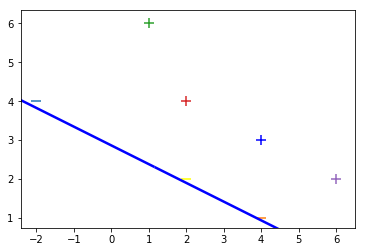

In [21]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')